<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/Variance_feature_selection_PCA_Breast_Cancer_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives


At the end of the experiment, you will be able to:

* Appy PCA using sklearn package

In [ ]:
#@title Experiment Walkthrough Video
from IPython.display import HTML
HTML("""<video width="854" height="480" controls>
<source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/PCA_Breast_Cancer_Walkthrough.webm" type="video/mp4">
</video>""")



## Dataset

### Description

skicit learn provides load_breast_cancer function to load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification dataset.

The dataset consists of 569 samples of 30 features with two classes as targets

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2304145" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7892449987" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U2W8_31_PCA_Breast_Cancer_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget -qq https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp1/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Importing required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

## Data Preparation

## Load the data from sklearn datasets

In [5]:
cancer = load_breast_cancer()

# Verify the features and targets names in load_breast_cancer dataset
print(cancer)




{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [10]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
# YOUR CODE HERE: To create a dataframe with all the features from the data
cancer_df.shape

# cancer_df.head()

(569, 30)

In [9]:

labels = cancer['target']
len(labels)

569

## Standardization (Scaling the data)

Standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis. For instance All features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function.

So, for each observed value of the variable, subtract the mean and divide by the standard deviation.

Standardization of datasets is a common requirement for many machine learning estimators, which is implemented in scikit-learn

In [11]:
from sklearn.preprocessing import StandardScaler
# YOUR CODE HERE: To apply the standard scaler on the data
scaler = StandardScaler()

scaled_df = scaler.fit_transform(cancer_df)
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Apply PCA on the scaled data

**Note:** Refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)



In [21]:
# YOUR CODE HERE: To create an object for PCA from sklearn and fit_transform the scaled data

from sklearn.decomposition import PCA
pca = PCA()

pca_df = pca.fit_transform(scaled_df)

In [22]:
pca_df.shape

(569, 30)

pca.explained_variance_ratio_ parameter returns a vector of the variance explained for each dimension.

PCA function provides explained_variance_ratio_ which gives the percentage of explained variance at each of the selected components.




In [23]:
variance = pca.explained_variance_ratio_
sorted(variance, reverse=True)

[0.44272025607526366,
 0.18971182044033078,
 0.09393163257431372,
 0.0660213491547015,
 0.05495768492346275,
 0.0402452203988334,
 0.022507337129825077,
 0.0158872380002133,
 0.013896493745591109,
 0.011689781894131503,
 0.009797189875980184,
 0.008705379007378843,
 0.008045249871967322,
 0.005233657454926354,
 0.0031378321676273973,
 0.0026620933651523167,
 0.0019799679253242708,
 0.0017539594502263593,
 0.0016492530592251628,
 0.0010386467483387053,
 0.0009990964637002526,
 0.0009146467510543457,
 0.0008113612588991071,
 0.0006018335666716713,
 0.0005160423791651873,
 0.000272587995477501,
 0.00023001546250596492,
 5.297792903809448e-05,
 2.4960103246876575e-05,
 4.434827427366915e-06]

Cumulative variance in PCA gives the percentage of variance accounted for by the first n components.

For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second component.

In [24]:
cumsum_explained_variance = np.cumsum(variance)
# YOUR CODE HERE: To calculate the cumsum of the variance
cumsum_explained_variance

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

Plotting the cumulative explained variance at each component

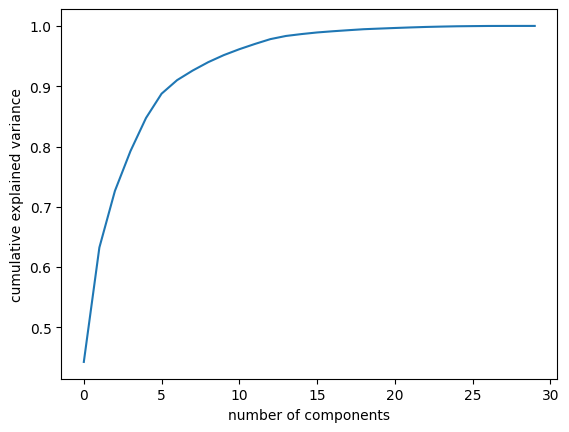

In [25]:
# YOUR CODE HERE: To plot the cumulative sum of the explained variance
plt.plot(cumsum_explained_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Plotting the variance percentage at each principal component

Cumulative sum is used to display the total sum of data as it grows with each component (or any other series or progression). It is view of the total contribution so far of a given measure against principal components

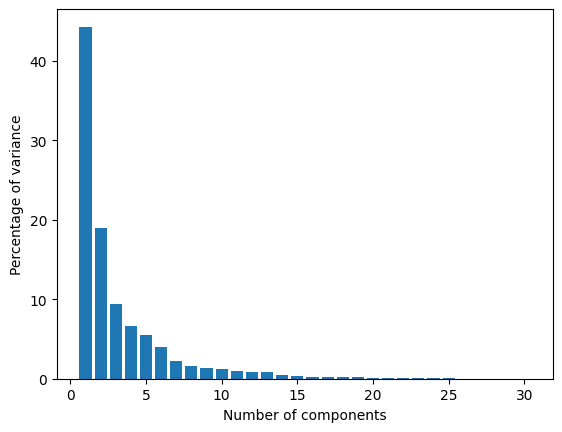

In [26]:
# Finding the variance between the each principal component
tot = sum(variance)
var_exp = [(i / tot)*100 for i in sorted(variance, reverse=True)]
plt.bar(range(1,len(var_exp)+1), var_exp)
plt.xlabel('Number of components')
plt.ylabel('Percentage of variance')
plt.show()

# YOUR CODE HERE: To plot the bar chart of variance percentage at each component

The first 7 principal component together contain 91% of the information. So, remaining components can safely be dropped without losing too much information

## Apply PCA after selecting the principal components

In [27]:
pca = PCA(n_components=7)
reduced_data = pca.fit_transform(scaled_df)
# YOUR CODE HERE: To fit and transform the data

## Split the data into train and test

In [28]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE: To split the data into train and test set

X_train,X_test,y_train,y_test = train_test_split(reduced_data,labels,test_size=0.2,random_state=42)

## Fit the model with reduced data

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# YOUR CODE HERE: To fit the SVC classifier and claculate the accuracy
svc = SVC()

svc.fit(X_train,y_train)

y_pred= svc.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9736842105263158


### Please answer the questions below to complete the experiment:




In [30]:
#@title State True or False: PCA will reduce the no.of samples of the data? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["","True", "False"]


In [31]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [32]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [33]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [34]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [35]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [37]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4687
Date of submission:  14 Jul 2024
Time of submission:  23:50:39
View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions
